# Dash Anomalías de temperatura

La apliclación desplegada tiene como objetivo de visualización los cambios de temperatura cercana a la superficie en todo el mundo, entre 1850 a 2018. El archivo presenta anomalías mensuales promedio de temperatura cercana a la superficie, en relación con el período 1961–1990.

En general, este conjunto de datos muestra un aumento del calentamiento promedio global desde mediados del siglo 19 y en los últimos años, en consonancia con otros análisis. Este fenómeno se debe a múltiples factores, incluidos una mejor representación del calentamiento del Ártico y una mejor comprensión de los sesgos en evolución en las mediciones sobre la superficie del mar y la tierra.



In [1]:
#Se cargan las libreias necesarias
import pandas as pd
from time import mktime
from datetime import datetime, timedelta
import time
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Temas para las figuras
sns.set_theme()
sns.set_context("paper")

## Manejo de la base de datos

In [4]:
# Leer los datos

url = "https://raw.githubusercontent.com/SandraMaldonado19/Dash_PF_Dataviz/main/originaldata_temp.csv"
df_temperature = pd.read_csv(url)
df_temperature.head()

,year,january,february,march,april,may,june,july,august,september,october,november,december,yearmean,Unnamed: 14
0,1850,-0.675,-0.333,-0.591,-0.589,-0.508,-0.344,-0.160,-0.208,-0.385,-0.533,-0.283,-0.404,-0.418,NaN
1,1850,53.000,47.000,44.000,48.000,49.000,49.000,52.000,55.000,57.000,55.000,58.000,58.000,NaN,NaN
2,1851,-0.201,-0.469,-0.646,-0.542,-0.198,-0.137,-0.097,-0.102,-0.091,-0.008,-0.082,-0.228,-0.233,NaN
3,1851,58.000,55.000,56.000,55.000,54.000,53.000,54.000,59.000,47.000,51.000,48.000,48.000,NaN,NaN
4,1852,-0.375,-0.477,-0.560,-0.585,-0.127,-0.084,0.005,-0.136,-0.002,-0.172,-0.305,0.065,-0.229,NaN


In [5]:
# Eliminar columna vacía

df_temperature = df_temperature.drop(df_temperature.columns[df_temperature.columns.str.contains('Unnamed')], axis=1)
df_temperature.head()

,year,january,february,march,april,may,june,july,august,september,october,november,december,yearmean
0,1850,-0.675,-0.333,-0.591,-0.589,-0.508,-0.344,-0.160,-0.208,-0.385,-0.533,-0.283,-0.404,-0.418
1,1850,53.000,47.000,44.000,48.000,49.000,49.000,52.000,55.000,57.000,55.000,58.000,58.000,NaN
2,1851,-0.201,-0.469,-0.646,-0.542,-0.198,-0.137,-0.097,-0.102,-0.091,-0.008,-0.082,-0.228,-0.233
3,1851,58.000,55.000,56.000,55.000,54.000,53.000,54.000,59.000,47.000,51.000,48.000,48.000,NaN
4,1852,-0.375,-0.477,-0.560,-0.585,-0.127,-0.084,0.005,-0.136,-0.002,-0.172,-0.305,0.065,-0.229


Con este código logramos eliminar la columna que no representar información sobre los datos que se desean analizar

In [6]:
# Eliminar filas intermedias
df_temperature = df_temperature.drop(df_temperature.index[1::2]).reset_index(drop=True)
df_temperature.head()


,year,january,february,march,april,may,june,july,august,september,october,november,december,yearmean
0,1850,-0.675,-0.333,-0.591,-0.589,-0.508,-0.344,-0.160,-0.208,-0.385,-0.533,-0.283,-0.404,-0.418
1,1851,-0.201,-0.469,-0.646,-0.542,-0.198,-0.137,-0.097,-0.102,-0.091,-0.008,-0.082,-0.228,-0.233
2,1852,-0.375,-0.477,-0.560,-0.585,-0.127,-0.084,0.005,-0.136,-0.002,-0.172,-0.305,0.065,-0.229
3,1853,-0.233,-0.404,-0.280,-0.386,-0.268,-0.142,-0.083,-0.057,-0.250,-0.392,-0.411,-0.337,-0.270
4,1854,-0.381,-0.361,-0.243,-0.334,-0.291,-0.299,-0.179,-0.239,-0.217,-0.095,-0.410,-0.450,-0.292


Este código se ejecutó para eliminar las filas que no son parte del estudio, con el objetivo de quedarnos con aquellas que aportan al desarrollo de este.

In [7]:
# Cambiar el formato del dataframe para que pueda tener variables identificadores de mi elección. 
## vamos a cambiar las columnas que son valores de meses, a elementos de la columna month para cada año.

# Convertir a formato de serie de tiempo

# Crear las nuevas columnas "month", "year" y "value"
df_timeseries = pd.DataFrame(columns=['year', 'month', 'value'])

# Iterar sobre las filas del DataFrame original
for index, row in df_temperature.iterrows():
    year = row['year']
    for month in df_temperature.columns[1:-1]:  # Ignorar la primera columna (year) y la última (yearmean)
        new_row = pd.DataFrame({'year': [year], 'month': [month], 'value': [row[month]]})
        df_timeseries = pd.concat([df_timeseries, new_row], ignore_index=True)


# Asegurarse de que los tipos de datos sean correctos
df_timeseries['year'] = df_timeseries['year'].astype(int)

# Ver el nuevo DataFrame transformado
df_timeseries.head(15)


,year,month,value
0,1850,january,-0.675
1,1850,february,-0.333
2,1850,march,-0.591
3,1850,april,-0.589
4,1850,may,-0.508
5,1850,june,-0.344
6,1850,july,-0.160
7,1850,august,-0.208
8,1850,september,-0.385
9,1850,october,-0.533


Este código usa pandas para transformar un DataFrame llamado 'df_temperature' en una serie de tiempo representada por otro DataFrame llamado 'df_timeseries'. Se crea un nuevo DataFrame con columnas 'year', 'month' y 'value'. Luego, se retoma sobre las filas del DataFrame original para extraer el año y cada valor mensual, creando un nuevo registro por cada mes con su respectivo dato. Después, se asegura que el tipo de dato de la columna 'year' sea entero y se muestra una vista previa de las primeras 15 filas del nuevo DataFrame 'df_timeseries' que contiene la serie de tiempo transformada.

In [8]:
# Crear la nueva columna de fecha en formato %Y-%m
df_timeseries['date'] = pd.to_datetime(df_timeseries['year'].astype(str) + '-' + df_timeseries['month'], format='%Y-%B')

# Formatear la fecha para que solo muestre mes y año
df_timeseries['date'] = df_timeseries['date'].dt.strftime('%Y-%m')

# Ver el DataFrame final con la nueva columna de fecha
print(df_timeseries)


      year      month  value     date
0     1850    january -0.675  1850-01
1     1850   february -0.333  1850-02
2     1850      march -0.591  1850-03
3     1850      april -0.589  1850-04
4     1850        may -0.508  1850-05
...    ...        ...    ...      ...
2083  2023     august  1.199  2023-08
2084  2023  september  1.347  2023-09
2085  2023    october -9.999  2023-10
2086  2023   november -9.999  2023-11
2087  2023   december -9.999  2023-12

[2088 rows x 4 columns]


Este código transforma el formato de fecha que se tiene de los datos originales con el fin de tener los datos en el formato requerido para la serie de tiempo.

In [9]:
# Eliminar las últimas tres filas
df_timeseries = df_timeseries.iloc[:-3]

# Ver el DataFrame después de eliminar las filas
print(df_timeseries)



      year      month  value     date
0     1850    january -0.675  1850-01
1     1850   february -0.333  1850-02
2     1850      march -0.591  1850-03
3     1850      april -0.589  1850-04
4     1850        may -0.508  1850-05
...    ...        ...    ...      ...
2080  2023        may  0.871  2023-05
2081  2023       june  1.052  2023-06
2082  2023       july  1.150  2023-07
2083  2023     august  1.199  2023-08
2084  2023  september  1.347  2023-09

[2085 rows x 4 columns]


In [10]:
df_timeseries.to_csv("df_timeseries.csv", index=False)

# Construcción del dash

* Antes de iniciar el análisis exploratorio de datos, primero importamos las bibliotecas necesarias, incluyendo `dash`, `plotly`, `pandas` y `numpy`. Luego, se carga el conjunto de datos de series temporales desde una URL específica en un DataFrame de pandas. Finalmente, muestra las primeras filas del DataFrame para verificar que los datos se hayan cargado correctamente.


```PowerShell
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np
from datetime import datetime

#____ Cargue de datos_________________________________________________________________________________________

timeseries_URL = "https://raw.githubusercontent.com/SandraMaldonado19/Dash_PF_Dataviz/main/df_timeseries.csv"
df_tseries = pd.read_csv(timeseries_URL)
df_tseries.head()

```

* Luego, graficamos la serie de tiempo con una media móvil de 12 meses. Definimos una función para calcular la media móvil y el intervalo de confianza de los datos. Además, una función de devolución de llamada que se activa cuando el usuario pasa el ratón sobre el gráfico. Esta función actualiza el gráfico para mostrar la serie temporal original, la media móvil y el intervalo de confianza.

```Python
import dash
from dash import  dcc, html, Input, Output
import datetime as dt
import pandas as pd


timeseries_URL = "https://raw.githubusercontent.com/SandraMaldonado19/Dash_PF_Dataviz/main/df_timeseries.csv"
df_tseries = pd.read_csv(timeseries_URL)


# Definimos la función encargada de calcular la media móvil y el intervalo de 
## En este código '1.96' es el valor z para un intervalo de confianza del 95%.

# Función para calcular la media móvil y el intervalo de confianza
def calculate_rolling_mean(df, window_size=12, num_of_std=1.96):
    df['rolling_mean'] = df['value'].rolling(window=window_size).mean()
    df['rolling_std'] = df['value'].rolling(window=window_size).std()
    df['upper_band'] = df['rolling_mean'] + (df['rolling_std'] * num_of_std)
    df['lower_band'] = df['rolling_mean'] - (df['rolling_std'] * num_of_std)
    return df

# Crear la aplicación Dash
app = dash.Dash(__name__)

# Diseño de la aplicación
app.layout = html.Div([
    html.H2('Análisis de Anomalía de Temperatura Global ',
                style={'display': 'inline',
                       'float': 'left',
                       'font-size': '2.65em',
                       'margin-left': '7px',
                       'font-weight': 'bolder',
                       'font-family': 'Product Sans',
                       'color': "rgba(117, 117, 117, 0.95)",
                       'margin-top': '20px',
                       'margin-bottom': '0'
                       }),
    dcc.Graph(id='timeseries-graph'),
])

# Definir la función callback
@app.callback(Output('timeseries-graph', 'figure'),
              [Input('timeseries-graph', 'hoverData')])
def update_graph(hoverData):
    # Calcular la media móvil y el intervalo de confianza
    df_timeseries = calculate_rolling_mean(df_tseries.copy())  # Asegúrate de tener una copia del DataFrame original
    trace_data = []

    # Agregar la serie temporal original
    trace_data.append({
        'x': df_timeseries['date'],
        'y': df_timeseries['value'],
        'type': 'line',
        'mode': 'lines',
        'name': 'Original Data',
        'line': {'color': 'blue'}
    })

    # Agregar la media móvil
    trace_data.append({
        'x': df_timeseries['date'],
        'y': df_timeseries['rolling_mean'],
        'type': 'line',
        'mode': 'lines',
        'name': '12-Month Rolling Mean',
        'line': {'color': 'red'}
    })

    # Agregar el intervalo de confianza
    trace_data.append({
        'x': df_timeseries['date'],
        'y': df_timeseries['upper_band'],
        'type': 'line',
        'mode': 'lines',
        'name': 'Upper Band',
        'line': {'color': 'green', 'dash': 'dash'}
    })

    trace_data.append({
        'x': df_timeseries['date'],
        'y': df_timeseries['lower_band'],
        'type': 'line',
        'mode': 'lines',
        'name': 'Lower Band',
        'line': {'color': 'green', 'dash': 'dash'}
    })

    # Marcar la media correspondiente al año cuando se pasa el ratón sobre la gráfica
    if hoverData:
        year_hovered = hoverData['points'][0]['x'].split('-')[0]
        mean_value = df_timeseries[df_timeseries['year'] == int(year_hovered)]['rolling_mean'].iloc[0]
        trace_data.append({
            'x': [hoverData['points'][0]['x']],
            'y': [mean_value],
            'type': 'scatter',
            'mode': 'markers',
            'name': f'Mean {year_hovered}',
            'marker': {'color': 'black', 'size': 10},
            'text': [f'Mean {year_hovered}']
        })

    figure = {
        'data': trace_data,
        'layout': {
            'title': 'Media Móvil de 12 Meses con Intervalo de Confianza',
            'xaxis': {'title': 'Fecha'},
            'yaxis': {'title': 'Valor'},
            'margin': {'b': 30, 'r': 10, 'l': 60, 't': 50},
            'legend': {'x': 0, 'y': 1}
        }
    }

    return figure

# Ejecutar la aplicación
if __name__ == '__main__':
    app.run_server(debug=True)

```

* Ahora creamos un boxplot para cada mes y una línea de tendencia que representa la media multianual

```Python
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objects as go
import pandas as pd

# Lectura de datos
df_tseries = pd.read_csv('./df_timeseries.csv')

# Crear la aplicación Dash
app = dash.Dash(__name__)

# Definir el diseño de la aplicación
app.layout = html.Div([
    html.H1("Boxplot Multianual por Mes"),

    dcc.Graph(id='boxplot'),

    # Puedes agregar más componentes de diseño según sea necesario
])

# Definir la función para actualizar el gráfico
@app.callback(Output('boxplot', 'figure'),
              [Input('boxplot', 'hoverData')])
def update_boxplot(hoverData):
    # Crear el boxplot con Plotly Graph Objects
    fig = go.Figure()

    # Agregar boxplots para cada mes
    for month in df_tseries['month'].unique():
        data = df_tseries[df_tseries['month'] == month]
        fig.add_trace(go.Box(x=data['month'], y=data['value'], name=month, width=0.5))

    # Agregar la línea de tendencia (media multianual)
    trend_line = df_tseries.groupby('month')['value'].mean().reset_index()
    
    # Ordenar los datos por el orden de los meses
    ordered_months = ['january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december']
    trend_line['month'] = pd.Categorical(trend_line['month'], categories=ordered_months, ordered=True)
    trend_line = trend_line.sort_values('month')

    fig.add_trace(go.Scatter(x=trend_line['month'], y=trend_line['value'],
                             mode='lines', line=dict(color='black', dash='dash'),
                             name='Media Multianual'))

    # Ajustar el diseño del gráfico
    fig.update_layout(xaxis={'title': 'Mes'}, yaxis={'title': 'Anomalía de Temperatura'},
                      boxmode='group')  # Para agrupar los boxplots en el eje x

    return fig

# Ejecutar la aplicación
if __name__ == '__main__':
    app.run_server(debug=True)
    
```

In [ ]:
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np
from datetime import datetime

timeseries_URL = "https://raw.githubusercontent.com/SandraMaldonado19/Dash_PF_Dataviz/main/df_timeseries.csv"
df_tseries = pd.read_csv(timeseries_URL)
df_tseries.head()


# Definimos la función encargada de calcular la media móvil y el intervalo de 
## En este código '1.96' es el valor z para un intervalo de confianza del 95%.

# Función para calcular la media móvil y el intervalo de confianza
def calculate_rolling_mean(df, window_size=12, num_of_std=1.96):
    df['rolling_mean'] = df['value'].rolling(window=window_size).mean()
    df['rolling_std'] = df['value'].rolling(window=window_size).std()
    df['upper_band'] = df['rolling_mean'] + (df['rolling_std'] * num_of_std)
    df['lower_band'] = df['rolling_mean'] - (df['rolling_std'] * num_of_std)
    return df

# Orden de los meses
month_order = ['january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december']
# Pivotar los datos para tener años en el eje x, meses en el eje y
heatmap_data = df_tseries.pivot(index='month', columns='year', values='value')
# Configurar el orden de los meses en el eje y
heatmap_data = heatmap_data.reindex(month_order)


# Convertir la columna 'date' a tipo datetime si aún no lo está
df_tseries['date'] = pd.to_datetime(df_tseries['date'])
# Agregar una columna 'decade' para agrupar por década
df_tseries['decade'] = (df_tseries['year'] // 10) * 10
# Agregar una columna 'color' basada en la condición de la anomalía
df_tseries['color'] = df_tseries['value'].apply(lambda x: 'red' if x > 0 else 'blue')

df_tseries['year'] = df_tseries['date'].dt.year
df_tseries['month'] = df_tseries['date'].dt.month
# Encuentra los tres años más cálidos, excluyendo el año actual
current_year = datetime.now().year
top_years = df_tseries[df_tseries['year'] != current_year].groupby('year')['value'].mean().nlargest(3).index
# Encuentra los valores máximos para cada mes
max_values = df_tseries.groupby('month')['value'].max()



app = dash.Dash(__name__, suppress_callback_exceptions=True)

app.layout = html.Div([
    dcc.Location(id='url', refresh=False),
    html.Main(style={'display':'grid', 'height':'100%','minHeight':'100vh','gridTemplateColumns': '50vh 1fr', 'gridTemplateRows': '50px 1fr 30px', }, children=[
       
        html.Nav(className='nav', style={'display':'fixed','gridArea':'nav', 'gridColumnStart':'1','gridColumnEnd':'2','gridRowStart':'1','gridRowEnd':'5', 'backgroundColor': 'white','border':'1px solid #cbc4ad', 'borderRadius':'5px', 'padding': '20px'}, children=[
            html.H1('Anomalia de Temperatura de Superficie Global', style={'color': 'black', 'marginBottom': '20px', 'fontSize':'1.5rem', 'textAlign':'center'}),
            html.H2('¿Cuáles han sido las variaciones más significativas de la temperatura de la superficie global a lo largo del tiempo?', style={'color': 'black', 'marginBottom': '20px', 'fontSize':'1rem', 'textAlign':'left'}),
            html.H3('¿Aumentará la temperatura los próximos meses?', style={'color': '#de3100', 'marginBottom': '20px', 'fontSize':'1rem','fontWeight':'900', 'textAlign':'left'}),
            html.Ul(style={'display': 'flex', 'justifyContent': 'center','flexDirection':'column', 'alignItems':'center', 'width':'100%','margin':'10px 0','padding':'0'},children =[
                dcc.Link('Inicio', href='/', style={'color': 'white', 'fontSize': '15px','width': '80%','marginBottom':'8px', 'textDecoration': 'none', 'padding': '10px', 'borderRadius': '5px', 'backgroundColor': '#ffa888', 'textAlign': 'center'}),
                dcc.Link('Serie de tiempo', href='/time-series', style={'color': 'white','width': '80%','marginBottom':'8px',  'fontSize': '15px', 'textDecoration': 'none', 'padding': '10px', 'borderRadius': '5px', 'backgroundColor': '#ffa888', 'textAlign': 'center'}),
                dcc.Link('Modelo Predictivo', href='/predictive-model', style={'color': 'white','width': '80%','marginBottom':'8px',  'fontSize': '15px', 'textDecoration': 'none', 'padding': '10px', 'borderRadius': '5px', 'backgroundColor': '#ffa888', 'textAlign': 'center'}),

            ]),
            html.Div(id='explain-content')
        ]),

        html.Section(id='page-content', className='section',style={'gridArea':'section', 'gridColumnStart':'2','gridColumnEnd':'4','gridRowStart':'1','gridRowEnd':'5','backgroundColor': 'white','border':'1px solid #cbc4ad', 'borderRadius':'5px', 'padding': '20px'}),
    ]),
])

@app.callback(Output('explain-content', 'children'),
              [Input('url', 'pathname')])
def display_page(pathname):
    if pathname == '/time-series':
        return html.Div() 
    elif pathname == '/predictive-model':
        return ()
    else:
        return (
            )
      
# Update the index
@app.callback(Output('page-content', 'children'),
              [Input('url', 'pathname')])
def display_page(pathname):
    if pathname == '/time-series':
        return (html.Div([
                 html.H2('Serie de tiempo - Anomalía de Temperatura Global (1850 - 2023)'),
                dcc.Graph(id='timeseries-graph'),
                ]),
                html.Div([
                    html.H2(" Boxplot - Variación mensual multianual (1850 - 2023)",),
                    dcc.Graph(id='boxplot')]),
                html.Div([
                    html.Div([
                        html.H2("Heatmap- Exploración de patrones y tendencias"),
                        dcc.Graph(id='heatmap'),]),
                    html.Div([
                        html.H1("Barplot - Promedios Decenales de Anomalías de Temperatura"),
                        dcc.Graph(id='bar-chart'),
                    ])
                ]),
                html.Div([
                    dcc.Dropdown(
                        id='year-picker',
                        options=[{'label': i, 'value': i} for i in df_tseries['year'].unique()],
                        value=[df_tseries['year'].max()],
                        multi=True
                    ),
                     dcc.Graph(id='temperature-graph')
                ])
            )
    elif pathname == '/predictive-model':
        return html.Div([
            html.H3('Estás en la página del modelo predictivo')
        ])
    else:
        return (
            html.H4('Sobre el conjunto de datos',style={'fontSize':'1rem', 'textAlign':'left'}),
            html.P('Presentamos el análisis de un conjunto de datos llamado HadCRUT5, que mide los cambios de temperatura cercana a la superficie en todo el mundo, entre 1850 a 2018. HadCRUT5 presenta anomalías mensuales promedio de temperatura cercana a la superficie, en relación con el período 1961–1990.', style={'fontSize':'0.8rem', 'textAlign':'left','lineHeight':'150%'}),
            html.P('En general, este conjunto de datos muestra un aumento del calentamiento promedio global desde mediados del siglo 19 y en los últimos años, en consonancia con otros análisis. Este fenómeno se debe a múltiples factores, incluidos una mejor representación del calentamiento del Ártico y una mejor comprensión de los sesgos en evolución en las mediciones sobre la superficie del mar y la tierra.', style={'fontSize':'0.8rem', 'textAlign':'left','lineHeight':'150%'}),
            html.P('Para revisar a detalle el proceso de obtención y procesamiento de los datos, visite la información de referencia. ', style={'fontSize':'0.8rem', 'textAlign':'left','lineHeight':'150%'}),
            html.P('Morice, C. P., Kennedy, J. J., Rayner, N. A., Winn, J. P., Hogan, E., Killick, R. E., Dunn, R. J. H., Osborn, T. J., Jones, P. D., & Simpson, I. R. (2021). An Updated Assessment of Near-Surface Temperature Change From 1850: The HadCRUT5 Data Set. Journal of Geophysical Research: Atmospheres, 126(3), e2019JD032361. https://doi.org/10.1029/2019JD032361', style={'fontSize':'0.8rem', 'textAlign':'left','lineHeight':'150%'}),
        )


# Definir la función callback
@app.callback(Output('timeseries-graph', 'figure'),
              [Input('timeseries-graph', 'hoverData')])
def update_graph(hoverData):
    # Calcular la media móvil y el intervalo de confianza
    df_timeseries = calculate_rolling_mean(df_tseries.copy())  # Asegúrate de tener una copia del DataFrame original
    trace_data = []

    # Agregar la serie temporal original
    trace_data.append({
        'x': df_timeseries['date'],
        'y': df_timeseries['value'],
        'type': 'line',
        'mode': 'lines',
        'name': 'Serie de tiempo',
        'line': {'color': 'blue'}
    })

    # Agregar la media móvil
    trace_data.append({
        'x': df_timeseries['date'],
        'y': df_timeseries['rolling_mean'],
        'type': 'line',
        'mode': 'lines',
        'name': 'Media móvil de 12 meses',
        'line': {'color': 'red'}
    })

    # Agregar el intervalo de confianza
    trace_data.append({
        'x': df_timeseries['date'],
        'y': df_timeseries['upper_band'],
        'type': 'line',
        'mode': 'lines',
        'name': 'IC - 95%',
        'line': {'color': 'green', 'dash': 'dash'}
    })

    trace_data.append({
        'x': df_timeseries['date'],
        'y': df_timeseries['lower_band'],
        'type': 'line',
        'mode': 'lines',
        'line': {'color': 'green', 'dash': 'dash'}
    })

    # Marcar la media correspondiente al año cuando se pasa el ratón sobre la gráfica
    if hoverData:
        year_hovered = hoverData['points'][0]['x'].split('-')[0]
        mean_value = df_timeseries[df_timeseries['year'] == int(year_hovered)]['rolling_mean'].iloc[0]
        trace_data.append({
            'x': [hoverData['points'][0]['x']],
            'y': [mean_value],
            'type': 'scatter',
            'mode': 'markers',
            'name': f'Mean {year_hovered}',
            'marker': {'color': 'black', 'size': 10},
            'text': [f'Mean {year_hovered}']
        })

    figure = {
        'data': trace_data,
        'layout': {
            'xaxis': {'title': 'Fecha'},
            'yaxis': {'title': 'Anomalía de temperatura (°C)'},
            'margin': {'b': 30, 'r': 10, 'l': 60, 't': 50},
            'legend': {'x': 0, 'y': 1}
        }
    }

    return figure

@app.callback(Output('boxplot', 'figure'),
              [Input('boxplot', 'hoverData')])
def update_boxplot(hoverData):
    # Crear el boxplot con Plotly Graph Objects
    fig = go.Figure()

    # Agregar boxplots para cada mes
    for month in df_tseries['month'].unique():
        data = df_tseries[df_tseries['month'] == month]
        fig.add_trace(go.Box(x=data['month'], y=data['value'], name=str(month), width=0.5))

    # Agregar la línea de tendencia (media multianual)
    trend_line = df_tseries.groupby('month')['value'].mean().reset_index()
    
    # Ordenar los datos por el orden de los meses
    ordered_months = ['january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december']
    trend_line['month'] = pd.Categorical(trend_line['month'], categories=ordered_months, ordered=True)
    trend_line = trend_line.sort_values('month')

    fig.add_trace(go.Scatter(x=trend_line['month'], y=trend_line['value'],
                             mode='lines', line=dict(color='black', dash='dash'),
                             name='Media Multianual'))

    # Ajustar el diseño del gráfico
    fig.update_layout(xaxis={'title': 'Mes'}, yaxis={'title': 'Anomalía de Temperatura (°C)'},
                      boxmode='group')  # Para agrupar los boxplots en el eje x

    return fig

@app.callback(Output('heatmap', 'figure'),
              [Input('heatmap', 'hoverData')])
def update_heatmap(hoverData):
    # Crear el mapa de calor con Plotly Graph Objects
    fig = go.Figure()

    # Añadir el mapa de calor
    fig.add_trace(go.Heatmap(x=heatmap_data.columns, y=heatmap_data.index, z=heatmap_data.values,
                             colorscale='RdBu', colorbar=dict(title='Anomalía de Temperatura'), reversescale=True))

    # Ajustar el diseño del gráfico
    fig.update_layout(xaxis={'title': 'Año'}, yaxis={'title': 'Mes', 'categoryorder': 'array', 'categoryarray': month_order})

    return fig


@app.callback(Output('bar-chart', 'figure'),
              [Input('bar-chart', 'hoverData')])
def update_bar_chart(hoverData):
    # Calcular los promedios decenales
    decade_means = df_tseries.groupby('decade').agg({'value': 'mean', 'color': 'first'}).reset_index()

    # Crear el gráfico de barras con Plotly Express
    fig = px.bar(decade_means, x='decade', y='value', color='color',
                 labels={'value': 'Anomalía de Temperatura (°C)'}, 
                 color_discrete_map={'red': 'red', 'blue': 'blue'})

    # Modificar las etiquetas de los ticks en el eje x
    fig.update_layout(
        xaxis=dict(
            tickmode='array',
            tickvals=decade_means['decade'],
            ticktext=[f"{decade}s" for decade in decade_means['decade']]
        ),
        showlegend=False
    )

    return fig

@app.callback(
    Output('temperature-graph', 'figure'),
    [Input('year-picker', 'value')]
)
def update_figure(selected_years):
    traces = []
    markers = ['circle', 'square', 'diamond', 'cross', 'x']

    # Añade las líneas para los años más cálidos
    for i, year in enumerate(top_years):
        df_year = df_tseries[df_tseries['year'] == year]
        traces.append(go.Scatter(
            x=df_year['month'],
            y=df_year['value'],
            mode='lines+markers',
            name=str(year),
            marker=dict(
                symbol=markers[i % len(markers)],
                size=10
            )
        ))

    # Añade las líneas para los años seleccionados
    for i, selected_year in enumerate(selected_years):
        df_selected = df_tseries[df_tseries['year'] == selected_year]
        traces.append(go.Scatter(
            x=df_selected['month'],
            y=df_selected['value'],
            mode='lines+markers',
            name=str(selected_year),
            line={'color': 'black', 'width': 2},
            marker=dict(
                symbol=markers[(i + len(top_years)) % len(markers)],
                size=10
            )
        ))

    # Añade la línea para los valores máximos
    traces.append(go.Scatter(
        x=np.arange(1, 13),
        y=max_values,
        mode='lines',
        name='Máximo histórico (1850 - 2022)',
        line={'color': 'darkgrey', 'width': 2.5}
    ))

    return {
        'data': traces,
        'layout': go.Layout(
            xaxis={'title': 'Mes', 'tickvals': list(range(1, 13)), 'ticktext': ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']},
            yaxis={'title': 'Anomalía de temperatura (°C)'},
            hovermode='closest'
        )
    }

if __name__ == '__main__':
    #app.run_server(debug=True) # <- For testing purposes
    app.run_server(debug=True, host='0.0.0.0', port=9000) # <- To Dockerize the Dash
    

Este código inicia de forma sencilla con el cargue de los datos. 
Seguido, el código crea una función llamada calculate_rolling_mean que trabaja con los datos para calcular la media móvil y establecer límites de confianza. Luego, basándose en estos cálculos, la función añade nuevas características al conjunto de datos: una para representar la media de esos valores y dos más para mostrar un rango de valores que son más o menos estándar, todo esto usando la idea de "desviación estándar" y un número específico que indica cuánto extender esos límites (por defecto, 1.96). Al final, devuelve el conjunto de datos actualizado, ahora con estos números adicionales que muestran cómo los valores varían a lo largo del tiempo.


Luego, se realiza una transformación de los datos almacenados en el DataFrame df_tseries para generar un mapa de calor (heatmap_data). Esta transformación reorganiza los datos para representar los años en el eje horizontal (X) y los meses en el eje vertical (Y). Despues, crea una nueva columna llamada 'decade' que agrupa los años por década para un análisis más general. Además, introduce una columna llamada 'color', que asigna un color ('rojo' o 'azul') basado en la condición de anomalía de los valores. Posteriormente, se generan columnas adicionales para el año y el mes, lo que permite un fácil acceso y manipulación de estos datos temporales.

También se identifica los tres años más cálidos almacenándolos en la variable top_years. También encuentra los valores máximos de temperatura para cada mes, guardándolos en la variable max_values. 


Seguido, se establece la estructura de la interfaz de usuario de una aplicación Dash, dividida en dos secciones: una barra de navegación y un área de contenido. La barra de navegación tiene enlaces para dirigirse a diferentes secciones de la aplicación. Dos funciones de callback se encargan de cambiar el contenido de la página según la URL seleccionada, mostrando gráficos y texto relevante. Además, se incluye información descriptiva sobre el conjunto de datos HadCRUT5 para contextualizar el análisis de la temperatura global. Este código permite una experiencia de usuario interactiva y dinámica.

Posteriormente, se presenta una función de callback diseñada para actualizar un gráfico en una aplicación Dash cuando se detecta un evento de "hover" (pasar el ratón por encima) en dicho gráfico. Al activarse el evento de "hoverData", la función realiza varias acciones: primero, calcula la media móvil y los límites del intervalo de confianza utilizando la función calculate_rolling_mean. Luego, crea una lista llamada trace_data para almacenar los datos del gráfico, incluyendo la serie temporal original, la media móvil, y los límites superior e inferior del intervalo de confianza, cada uno representado por líneas de colores distintos. Además, cuando se pasa el ratón sobre el gráfico, la función identifica el año correspondiente al punto en el que está posicionado el ratón y marca la media de dicho año en el gráfico con un punto negro.

Siguiendo la misma linea, tenemos dos bloques de código que presentan funciones de callback. La primera función, update_boxplot, genera un gráfico de cajas (boxplot) utilizando Plotly Graph Objects. Esta función itera sobre cada mes en el conjunto de datos y agrega un boxplot correspondiente a cada mes, representando la distribución de las anomalías de temperatura en ese mes específico. Además, añade una línea de tendencia que muestra la media multianual de las anomalías de temperatura para cada mes. El diseño del gráfico se ajusta para mostrar en el eje x los meses y en el eje y las anomalías de temperatura en grados Celsius.

La segunda función, update_heatmap, crea un gráfico de mapa de calor con Plotly Graph Objects. Este mapa de calor representa las anomalías de temperatura a lo largo de los años y meses. Se utiliza un heatmap para visualizar las variaciones de temperatura a lo largo del tiempo. La función agrega el heatmap utilizando los datos ya preparados en la variable heatmap_data y ajusta el diseño del gráfico para mostrar los años en el eje x y los meses en el eje y, manteniendo el orden específico de los meses.

Los últimos bloques de código son : update_bar_chart, genera un gráfico de barras que muestra los promedios decenales de las anomalías de temperatura. Calcula estos promedios agrupando los datos por década y luego utiliza Plotly Express para crear el gráfico de barras, donde cada barra representa el promedio de temperatura de una década particular. Modifica las etiquetas en el eje x para mostrar décadas y colores que representan las tendencias de temperaturas más cálidas o más frías.

La segunda función, update_figure, actualiza un gráfico de líneas dinámico. Esta función utiliza los años seleccionados para representar las anomalías de temperatura a lo largo de los meses. Genera líneas para los años más cálidos, los años seleccionados y también agrega una línea que muestra los valores máximos históricos de anomalías de temperatura para cada mes. Ajusta el diseño del gráfico para mostrar los meses en el eje x y las anomalías de temperatura en grados Celsius en el eje y, permitiendo que el usuario explore las variaciones de temperatura a lo largo de los años.

La condición if __name__ == '__main__': permite ejecutar la aplicación Dash, ya sea en modo de depuración (debug=True) para pruebas o configurado para ser utilizado en un entorno Docker (host='0.0.0.0', port=9000). Estas funciones de callback son fundamentales para actualizar y renderizar gráficos dinámicos en función de la interacción del usuario en la aplicación Dash.

# Modelo predictivo
## ARIMA

* Para la construcción del modelo ARIMA, inicialmente utilizaremos una prueba estadística para verificar si la serie de tiempo es estacionaria o no. Esta prueba es la de Dickey-Fuller. Para hacer uso de esta prueba importamos la función adfuller de la clase statsmodels.tsa.stattools. Para aplicar el test pasamos los datos de la anomalía de temperatura, serie de tiempo de interés, usando df_tseries. Éste será el argumento de la función adfuller encargada de realizar el test de Dickey-Fuller. La hipótesis nula asume que los datos no son estacionarios. Esto implica que la media de los datos puede cambiar con el tiempo, lo que significa que la diferenciación podría ser un paso razonable para tratar de hacer que los datos sean estacionarios.


In [45]:
timeseries_URL = "https://raw.githubusercontent.com/SandraMaldonado19/Dash_PF_Dataviz/main/df_timeseries.csv"
df_tseries = pd.read_csv(timeseries_URL)
df_tseries.head()

,year,month,value,date
0,1850,january,-0.675,1850-01
1,1850,february,-0.333,1850-02
2,1850,march,-0.591,1850-03
3,1850,april,-0.589,1850-04
4,1850,may,-0.508,1850-05


In [14]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_tseries.value)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -0.094270
p-value: 0.950006


* Como el estadístico ADF, que es -0.0943, es mayor que los valores críticos de -2.5, -3.4 y -2.8 (correspondientes a los intervalos de confianza del 1%, 5% y 10%, respectivamente), se concluye que la hipótesis nula es aceptada. Esto sugiere que la serie de tiempo no es estacionaria. Del mismo modo,  el valor p de 0.95 > 0.05, reforzando la conclusión de que la serie de tiempo no es estacionaria.


* Ahora crearemos gráficos de autocorrelación para confirmar la estacionariedad de la serie temporal y determinar el orden de integración necesario para transformar nuestra serie temporal no estacionaria en estacionaria. Para ello, utilizaremos la función plot_acf de Python, que toma como argumentos la serie temporal de interés y el número de rezagos que deseamos considerar en el gráfico. Es importante tener en cuenta que utilizamos la función .diff() para diferenciar nuestras series temporales y eliminar las tendencias. Además, se elimina cualquier valor NaN que pueda surgir durante este proceso, ya que el gráfico consiste en representar gráficamente todos los valores definidos previamente, evitando cualquier denominador nulo. Crearemos tres gráficos: uno para la autocorrelación de la serie original, otro para la serie diferenciada de primer orden y otro para la serie diferenciada de segundo orden.



In [31]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

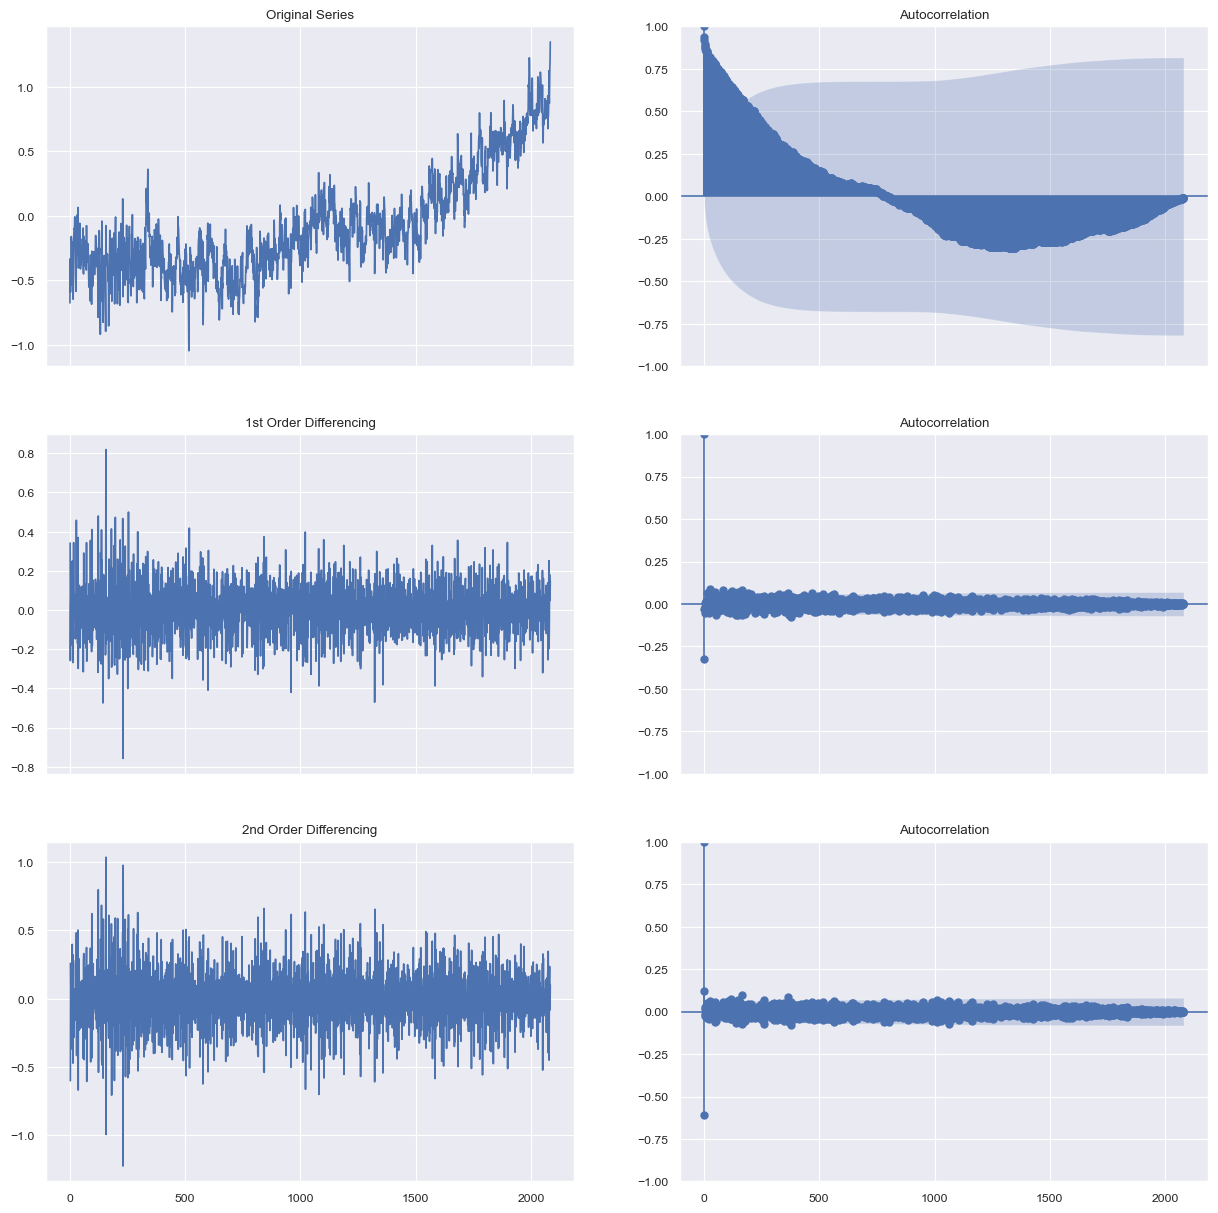

In [39]:
plt.rcParams.update({'figure.figsize': (15,15)})

fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df_tseries.value); axes[0, 0].set_title('Original Series')
plot_acf(df_tseries.value, ax=axes[0, 1], lags = 2080);
#plot_pacf(df_tseries.value, ax=axes[0, 2], lags = 1040);


axes[1, 0].plot(df_tseries.value.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df_tseries.value.diff().dropna(), ax=axes[1, 1], lags = 2080);
#plot_pacf(df_tseries.value, ax=axes[1, 2], lags = 1040);

axes[2, 0].plot(df_tseries.value.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df_tseries.value.diff().diff().dropna(), ax=axes[2, 1], lags = 2080);
#plot_pacf(df_tseries.value, ax=axes[2, 2], lags = 100);

* La primera figura de autocorrelación muestra un decaimiento geométrico en la parte positiva con una tendencia lineal, lo que indica no estacionariedad, como confirma la prueba de Dickey-Fuller. Los intervalos de confianza se muestran en forma de cono, fijados por defecto en el 95%. El gráfico de autocorrelación de la segunda diferenciación entra rápidamente en la zona negativa, lo que sugiere una posible sobrediferenciación.



In [46]:
# Comprobación de estacionariedad con una diferenciación.
df_dff = df_tseries.value.diff()
df_dff = df_dff.dropna() 

result = adfuller(df_dff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -15.697771
p-value: 0.000000


* Como el estadístico ADF, que es -15.7, es menor que los valores críticos de -2.5, -3.4 y -2.8 (correspondientes a los intervalos de confianza del 1%, 5% y 10%, respectivamente), se concluye que la hipótesis nula se rechaza. Esto sugiere que la serie de tiempo es estacionaria con una diferenciación. Del mismo modo,  el valor p de 0.000 < 0.05, reforzando la conclusión de que la serie de tiempo es estacionaria.

* Definimos ahora nuestro conjuntos de entrenamiento y testeo para el modelo ARIMA, en éste caso nuestro test corresponde a los últimos 21 meses, correspondientes a los 12 meses del 2022 y los 9 meses del 2023. El train corresponde a la serie de tiempo original menos estos 21 meses.  El mejor modelo será obtenido mediante uso de los datos de entrenamiento y el criterio de Akaike y de inferencia Bayesiana el cual penaliza la suma de los residuos al cuadrado por incluir parámetros adicionales en el modelo, los modelos que tienen valores pequeños del AIC o BIC se consideran buenos modelos.

In [50]:
n_temp = len(df_tseries.value); n_test = 21 
train_size = n_temp - n_test

train = df_tseries.value.iloc[:train_size]
dates_train = df_tseries.date.iloc[:train_size]
test_21month = df_tseries.value.iloc[train_size:train_size + n_test] 
dates_21month = df_tseries.date.iloc[train_size:train_size + n_test] 
print("train:", train.shape)
print("test_1w:", test_21month.shape)

train: (2064,)
test_1w: (21,)


In [51]:
train_df = df_tseries[["date", "value"]].iloc[:train_size]
test_21month_df = df_tseries[["date", "value"]].iloc[train_size:train_size + n_test] 

Utlizamos ahora el modelo ARIMA importado desde la librería statsmodels de Python para obetener distintos ARIMA de ordenes 
. Consideramos method = 'mle' para el cálculo de la verosimilitud exacta a través del filtro de Kalman. Como ejercicio puede reescribir estas líneas de código en una función que dependa sólo del input train y retorne los ordenes 
 asociados al criterio AIC de bondad de ajuste

In [ ]:
import dash
import dash_bootstrap_components as dbc
from dash import html, dcc
from dash.dependencies import Input, Output
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import plotly.graph_objs as go
from statsmodels.tsa.stattools import acf
from plotly.subplots import make_subplots


#____ Cargue de datos___________________________________________________________________________________________________________

timeseries_URL = "https://raw.githubusercontent.com/SandraMaldonado19/Dash_PF_Dataviz/main/df_timeseries.csv"
df_tseries = pd.read_csv(timeseries_URL)

#____Cálculos y funciones________________________________________________________________________________________________________

#----Definimos el conjunto de prueba y de entrenamiento--------------------------------------------------------------------------
n_temp = len(df_tseries.value); n_test = 21 
train_size = n_temp - n_test

train = df_tseries.value.iloc[:train_size]
dates_train = df_tseries.date.iloc[:train_size]
test_21month = df_tseries.value.iloc[train_size:train_size + n_test] 
dates_21month = df_tseries.date.iloc[train_size:train_size + n_test] 

train_df = df_tseries[["date", "value"]].iloc[:train_size]
test_21month_df = df_tseries[["date", "value"]].iloc[train_size:train_size + n_test] 


#____ Configuramos la aplicación__________________________________________________________________________________________________

app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

app.layout = html.Div([
    html.H2('Datos de entrenamiento'),
    dcc.Graph(id='traindata-graph')
])

@app.callback(Output('traindata-graph', 'figure'),
              [Input('traindata-graph', 'hoverData')])
def update_graph(hoverData):
    trace_data = []

    # Agregar la serie de entrenamiento
    trace_data.append({
        'x': dates_train,
        'y': train,
        'type': 'line',
        'mode': 'lines',
        'name': 'Entrenamiento',
        'line': {'color': 'purple'}
    })

    # Agregar la serie de prueba
    trace_data.append({
        'x': dates_21month,
        'y': test_21month,
        'type': 'line',
        'mode': 'lines',
        'name': 'Prueba',
        'line': {'color': 'orange'}
    })

    # Marcar la media correspondiente al año cuando se pasa el ratón sobre la gráfica
    if hoverData:
        year_hovered = hoverData['points'][0]['x'].split('-')[0]
        mean_value = df_tseries[df_tseries['year'] == int(year_hovered)]['rolling_mean'].iloc[0]
        trace_data.append({
            'x': [hoverData['points'][0]['x']],
            'y': [mean_value],
            'type': 'scatter',
            'mode': 'markers',
            'name': f'Media {year_hovered}',
            'marker': {'color': 'black', 'size': 10},
            'text': [f'Media {year_hovered}']
        })

    figure = {
        'data': trace_data,
        'layout': {
            'xaxis': {'title': 'Fecha'},
            'yaxis': {'title': 'Anomalía de temperatura (°C)'},
            'margin': {'b': 30, 'r': 10, 'l': 60, 't': 50},
            'legend': {'x': 0, 'y': 1}
        }
    }

    return figure


if __name__ == "__main__":
    app.run_server(debug=True)

* Utilizaremos el modelo ARIMA importado desde la librería statsmodels de Python para obetener distintos ARIMA de ordenes 
. Consideramos method = 'mle' para el cálculo de la verosimilitud exacta a través del filtro de Kalman. Como ejercicio puede reescribir estas líneas de código en una función que dependa sólo del input train y retorne los ordenes 
 asociados al criterio AIC de bondad de ajuste.

* Este código es una aplicación de Dash que utiliza un modelo ARIMA para predecir la anomalía de temperatura. Primero, importa las bibliotecas necesarias y carga un conjunto de datos de series temporales desde una URL. Luego, divide los datos en conjuntos de entrenamiento y prueba. Después, selecciona el mejor modelo ARIMA basándose en el criterio de información de Akaike (AIC). Una vez seleccionado el modelo, se ajusta a los datos de entrenamiento y se utilizan las predicciones para generar un gráfico interactivo. Este gráfico muestra los datos de entrenamiento, las predicciones del modelo y los límites de confianza de las predicciones. Todo esto se presenta en una interfaz de usuario de Dash

```Python
import dash
from dash import html, dcc
import pandas as pd
import plotly.graph_objs as go
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")


#____ Cargue de datos___________________________________________________________________________________________________________

timeseries_URL = "https://raw.githubusercontent.com/SandraMaldonado19/Dash_PF_Dataviz/main/df_timeseries.csv"
df_tseries = pd.read_csv(timeseries_URL)

#____Cálculos y funciones________________________________________________________________________________________________________

#----Definimos el conjunto de prueba y de entrenamiento--------------------------------------------------------------------------
n_temp = len(df_tseries.value); n_test = 21 
train_size = n_temp - n_test

train = df_tseries.value.iloc[:train_size]
dates_train = df_tseries.date.iloc[:train_size]
test_21month = df_tseries.value.iloc[train_size:train_size + n_test] 
dates_21month = df_tseries.date.iloc[train_size:train_size + n_test] 

train_df = df_tseries[["date", "value"]].iloc[:train_size]
test_21month_df = df_tseries[["date", "value"]].iloc[train_size:train_size + n_test] 


#----Función para seleccionar el mejor modelo------------------------------------------------------------------------------------
best_aic = np.inf
best_bic = np.inf

best_order = None
best_mdl = None

pq_rng = range(5)
d_rng  = range(3)

for i in pq_rng:
    for d in d_rng:
        for j in pq_rng:
            try:
                # print(i, d, j)
                tmp_mdl = ARIMA(train, order=(i,d,j)).fit()
                tmp_aic = tmp_mdl.aic
                if tmp_aic < best_aic:
                    best_aic = tmp_aic
                    best_order = (i, d, j)
                    best_mdl = tmp_mdl
            except: continue

#----Ajustar el modelo ARIMA y obtener el pronóstico------------------------------------------------------------------------------

model = ARIMA(train, order=best_order)
model_fit = model.fit()
predictions = model_fit.get_prediction(start=1, end=len(train), dynamic=False)
pred_conf = predictions.conf_int()

#____ Configuramos la aplicación__________________________________________________________________________________________________

app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Graph(
        id='graph',
        figure={
            'data': [
                go.Scatter(
                    x=dates_train[1:],
                    y=train.loc[1:],
                    mode='lines',
                    name='Datos de entrenamiento'
                ),
                go.Scatter(
                    x=dates_train[1:],
                    y=predictions,
                    mode='lines',
                    name='Predicciones'
                ),
               go.Scatter(
                    x=dates_train[1:],
                    y=pred_conf[:, 0],
                    mode='lines',
                    name='Límite inferior del intervalo de confianza',
                    line=dict(color='rgb(255,165,0)')
                ),
                go.Scatter(
                    x=dates_train[1:],
                    y=pred_conf[:, 1],
                    mode='lines',
                    fill='tonexty',
                    name='Límite superior del intervalo de confianza',
                    line=dict(color='rgb(255,165,0)')
                ) 
            ],
            'layout': go.Layout(
                title='Rendimiento del modelo',
                xaxis={'title': 'Año'},
                yaxis={'title': 'Anomalía de temperatura (°C)'},
                autosize=False,
                width=1200,
                height=1000,
            )
        }
    )
])

if __name__ == '__main__':
    app.run_server(debug=True)

```

* Para medir el error de predicción cometido en las predicciones, utilizaremos las métricas usuales en análisis de series de tiempo: MAPE, MAE, RMSE, MSE

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
def forecast_accuracy(forecast, actual, str_name):
    
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual)) # MAPE
    mae = np.mean(np.abs(forecast - actual))                 # MAE
    rmse = np.mean((forecast - actual)**2)**.5               # RMSE
    mse = np.mean((forecast - actual)**2)                    # MSE
    r2 = r2_score(forecast, actual)
    
    df_acc = pd.DataFrame({'MAE': [mae],
                           'MSE': [mse],
                           'MAPE': [mape],
                           'RMSE': [rmse],
                           'R2': [r2]},
                          index=[str_name])
    
    return df_acc

* Realizamos ahora predicciones utlilizando rolling forecasting. El rolling forecast entrega reportes que utilizan datos históricos para predecir cifras futuras de forma continua durante un periodo de tiempo. Las previsiones continuas se utilizan a menudo en los reportes financieros, la gestión de la cadena de suministro, la planificación y la elaboración de presupuestos. El rolling forecast es una ayuda esencial para tomar decisiones empresariales acertadas. Gracias a su capacidad de respuesta, las previsiones continuas ayudan a las empresas a responder más rápidamente a las condiciones cambiantes del mercado. Si se utilizan con eficacia, las previsiones continuas pueden ayudar a identificar las deficiencias de rendimiento, acortar los ciclos de planificación y tomar la mejor decisión para los resultados. Para nuestros ejemplos, nuestro horizonte de predicción será de un día

In [ ]:
def arima_rolling(history, test):
    
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=best_order)
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))
        
    return predictions

In [ ]:
test_1wl = test_1w.tolist()
yhat_1w  = arima_rolling(train.tolist(), test_1wl)

* Utilizaremos ahora las funciónes creadas anteriormente para calcular el error de predicción y linpeplot para graficarle junto a la serie de tiempo orginal de test

In [ ]:
forecast_accuracy(np.array(test_1wl), np.array(yhat_1w), "week 1")

In [ ]:
plt.figure(figsize = (8, 6))
ax = sns.lineplot(x=dates_train[-120:], y=train[-120:], label="Train", color='g')
sns.lineplot(x=dates_1w, y=test_1wl, label="Test", color='b')
sns.lineplot(x=dates_1w, y=yhat_1w, label="Forecast", color='r')
freq = int(4)
xtix = ax.get_xticks()
ax.set_xticks(xtix[::freq])
plt.tight_layout()
plt.xticks(rotation=50);